In [1]:
# 라이브러리 설치
# !pip install matplotlib

In [2]:
import pandas as pd
import numpy as np

# 현재 컴퓨터의 OS를 확인하기 위한 라이브러리
import platform
import matplotlib.pyplot as plt

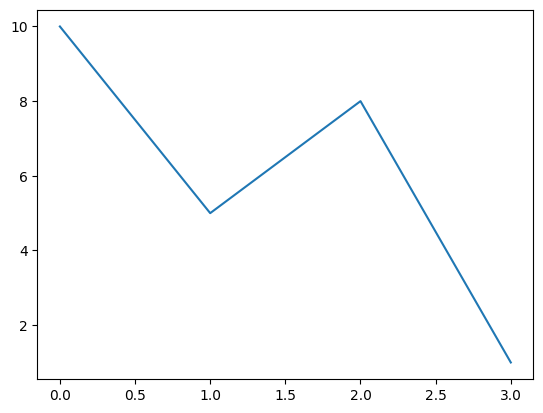

In [3]:
# 라인 그래프 생성
# case1: y축의 데이터만 존재하는 경우
y = [10, 5, 8, 1]
# plot(): 라인 그래프를 그려주는 함수
plt.plot(y)

plt.show()

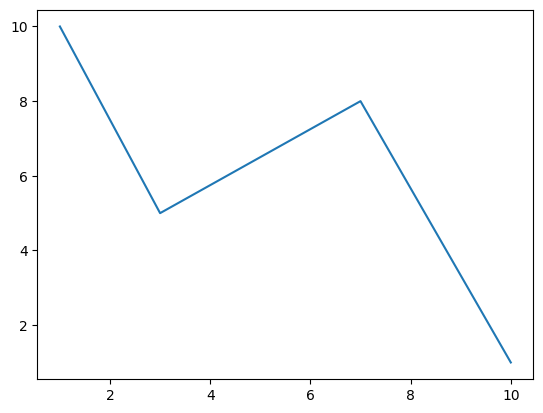

In [4]:
# case2: x축의 데이터와 y축의 데이터가 모두 존재하는 경우
x = [1, 3, 7, 10]
y = [10, 5, 8, 1]

plt.plot(x, y)

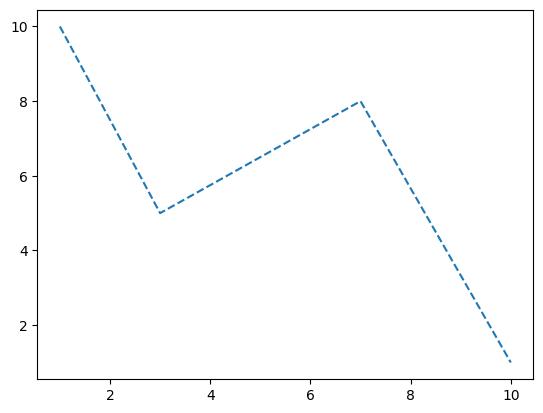

In [5]:
# 선의 종류와 색 변경
plt.plot( x, y,'--' )
plt.show()

plt.show()

In [6]:
# 기본 폰트가 영문만 지원해서 한글을 사용하면 □으로 출력된다.
# 한글 깨짐 방지를 위해서 matplot 기본 설정 폰트를 변경

# 사용하고 있는 컴퓨터의 OS가 MAC인 경우
if platform.system() == 'Darwin':
    plt.rc('font', family = 'AppleGothic')
else:
    plt.rc('font', family = 'Malgun Gothic')

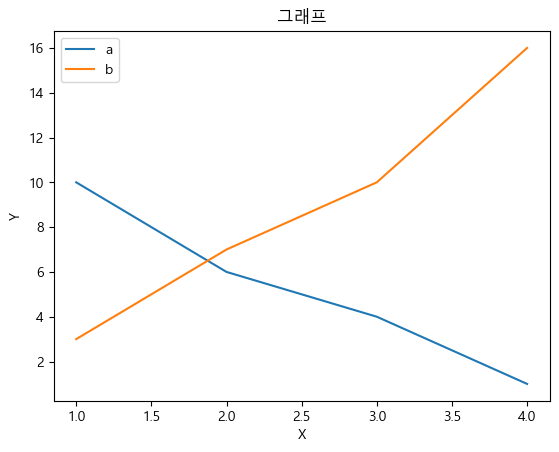

In [7]:
# 그래프 합치기
# 하나의 공간에 2개의 라인 그래프 형성
x = [1, 2, 3, 4]
y = [10, 6, 4, 1]
y2 = [3, 7, 10 ,16]

plt.plot(x, y)
plt.plot(x, y2)

# x축 라벨링
plt.xlabel('X')
# y축 라벨링
plt.ylabel('Y')
# 그래프 제목
plt.title('그래프')
# 그래프별 범례
plt.legend( ['a', 'b'])

plt.show()

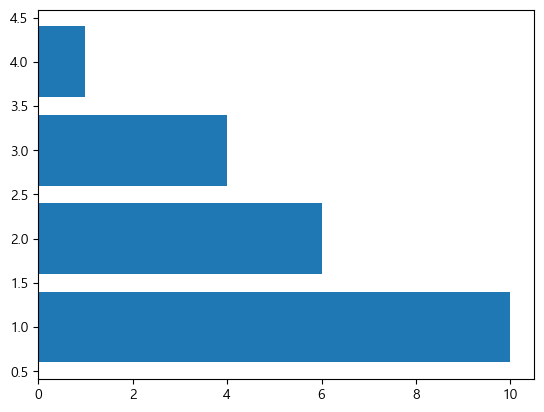

In [8]:
# 수평 막대 rm래프
plt.barh(x, y)
plt.show()

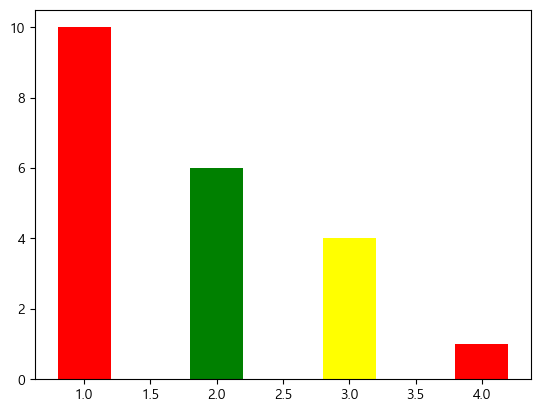

In [9]:
plt.bar(
    # 색깔 지정이 데이터보다 모자라면 색상 로테이션
    x, y, width = 0.4, color = ['red', 'green', 'yellow']
)
plt.show()

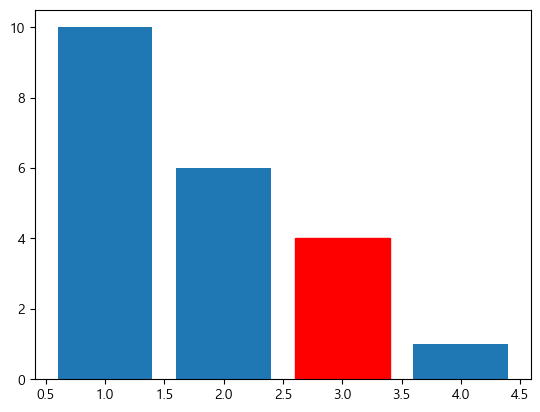

In [10]:
# 막대 그래프에서 특정 막대 설정 변경
bar_graph = plt.bar(x, y)

# bar_graph의 3번째 막대(index 2)를 선택해 색상 변경
bar_graph[2].set_color('r')

plt.show()

In [11]:
# 산점도 그래프 -> 상관계수를 통한 상관관계 확인
x = np.random.random(50)
y = np.random.random(50)

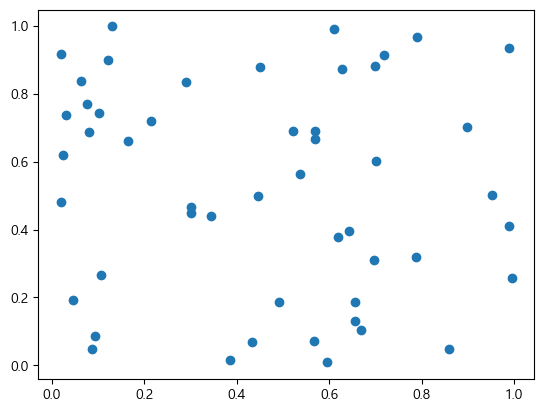

In [12]:
plt.scatter(x, y)
plt.show()

---

In [102]:
# drinks.csv 파일 로드 - 각 국가별 술 소비량
 # spirit = 증류주
df = pd.read_csv("../csv/drinks.csv")
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [103]:
# 피어슨 상관계수
df.iloc[:, 1:-1].corr('pearson')

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000


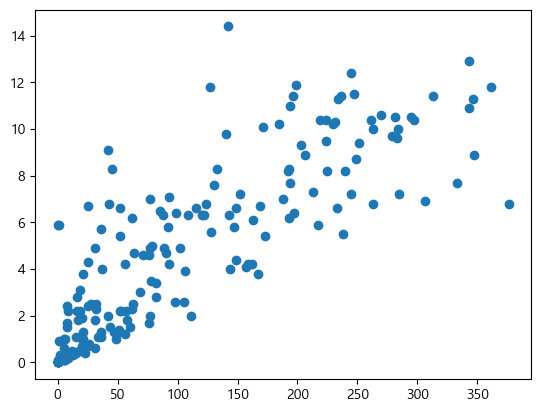

In [104]:
# df에서 맥주 소비량과 순수알콜량의 상관계수가 0.8 이상이다.
# 산점도 확인
x = df['beer_servings']
y = df['total_litres_of_pure_alcohol']

plt.scatter(x, y)

plt.show()

1. csv 폴더 안에 있는 drinks.csv 파일 로드
2. 데이터프레임의 정보를 확인하고 결측치의 존재 파악
3. 컬럼의 이름 변경</br>-> [국가, 맥주소비량, 증류주소비량, 와인소비량, 순수알콜량, 대륙]
4. 결측치는 대륙 column에 존재</br>-> 결측치를 'OT'로 대체
5. 파생변수 '총소비량' 생성</br>-> 맥주소비량 + 증류주소비량 + 와인소비량
6. 파생변수 '도수' 생성</br> -> (순수알콜량 / 총소비량) * 100
7. 대륙별로 그룹화해 도수 평균을 구하고, 가장 독한 술을 먹는 대륙이 어디인지 알아본다.

In [105]:
# 2. 데이터프레임 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [106]:
# 보통 첫 번째 컬럼이 고유값이므로 한 국가에 여러 데이터가 있지는 않을 것.
# 그러나 혹시 모르니 한 번 더 체크!

# country 컬럼의 데이터가 고유식별자(primary key)인가?
# 고유식별자 조건: 고유하고 null이 아닌 데이터
# 고유한지 확인하려면, 데이터에 중복이 없는지 확인해보면 된다.

# 방법 1
len(df['country'].unique())
# 출력 결과가 193이니 고유함!

193

In [107]:
# 방법 2
df['country'].value_counts()
# value_counts()는 기본적으로 출력 결과가 내림차순이다.
# 맨 처음이 1이므로 모두 1개씩 있다는 뜻이다. 따라서 고유함!

country
Afghanistan    1
Albania        1
Algeria        1
Andorra        1
Angola         1
              ..
Venezuela      1
Vietnam        1
Yemen          1
Zambia         1
Zimbabwe       1
Name: count, Length: 193, dtype: int64

In [108]:
# 결측치의 개수 확인
# bool 데이터 합산을 통해 결측치 존재 유무를 알 수 있다.
df.isna().sum()

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64

In [109]:
# 기본 통계량 정보
df.describe()

# 제 3사분위수와 max값, 또는 제 1사분위수와 min값이 차이가 큰지를 확인해볼수도 있다.

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [110]:
df['continent'].describe()

count     170
unique      5
top        AF
freq       53
Name: continent, dtype: object

In [111]:
df['continent'].value_counts()

continent
AF    53
EU    45
AS    44
OC    16
SA    12
Name: count, dtype: int64

In [112]:
# 3. 컬럼 이름 변경
# case 1: rename() -> 기준의 이름을 재지정하므로, 인덱스와 컬럼의 이름이 변경된다.
# 바꾸고 저장되기 전 확인 가능하므로, case 1이 일반적으로 더 좋은 방법.
df.rename(
    columns={
        'country':'국가',
        'beer_servings':'맥주소비량',
        'spirit_servings':'증류주소비량',
        'wine_servings':'와인소비량',
        'total_litres_of_pure_alcohol':'순수알콜량',
        'continent':'대륙'
    }
)

,국가,맥주소비량,증류주소비량,와인소비량,순수알콜량,대륙
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [113]:
# case 2: 데이터프레임 안의 변수 columns에 데이터 대입
# 매번 써주기 귀찮으므로, 전체 컬럼을 바꿀 땐 case2 선호.
# 기존 컬럼들의 개수와 대입하는 데이터의 개수가 같아야 함을 유의.
df.columns = ['국가', '맥주소비량', '증류주소비량', '와인소비량', '순수알콜량', '대륙']

df.head(1)

,국가,맥주소비량,증류주소비량,와인소비량,순수알콜량,대륙
0,Afghanistan,0,0,0,0.0,AS


In [114]:
# 4. 대륙 컬럼의 결측치를 다른 특정 데이터로 대체(교체/채워준다)
# case 1
df['대륙'].replace( np.nan, 'OT' ).isna().sum()

np.int64(0)

In [115]:
# 4. 대륙 컬럼의 결측치를 다른 특정 데이터로 대체(교체/채워준다)
# case 2
df['대륙'] = df['대륙'].fillna('OT')
df.isna().sum()

국가        0
맥주소비량     0
증류주소비량    0
와인소비량     0
순수알콜량     0
대륙        0
dtype: int64

In [116]:
# 5. 파생변수 생성
# 개수가 적을 땐 이 방법이 효율적
df['맥주소비량'] + df['와인소비량'] + df['증류주소비량']

0        0
1      275
2       39
3      695
4      319
      ... 
188    436
189    114
190      6
191     55
192     86
Length: 193, dtype: int64

In [117]:
# 개수가 많을 땐 이 방법이 효율적
df['총소비량'] = df.loc[ : , '맥주소비량':'와인소비량'].sum(axis=1)

df['총소비량']

0        0
1      275
2       39
3      695
4      319
      ... 
188    436
189    114
190      6
191     55
192     86
Name: 총소비량, Length: 193, dtype: int64

In [118]:
# 도수 컬럼 생성
# (순수알콜량/총술소비량) * 100
df['도수'] = ((df['순수알콜량'] / df['총소비량']) * 100).fillna(0)

df['도수']

0      0.000000
1      1.781818
2      1.794872
3      1.784173
4      1.849530
         ...   
188    1.766055
189    1.754386
190    1.666667
191    4.545455
192    5.465116
Name: 도수, Length: 193, dtype: float64

In [119]:
# 대륙을 기준으로 그룹화
# case 1: gruopby() 함수를 이용해 그룹화 연산
    # groupby( 그룹화할 컬럼명 )
# df.groupby( ['대륙'] )는 문자 섞인 object 타입이라 mean 사용 불가.
# filter를 할 수록 차원이 하나씩 내려간다.
    # '도수'에 대괄호든 소괄호든 2개 쓰면 가변(*)이 된다.
    # 컴퓨터는 일단 [ ] 안에 있는 데이터의 타입만 보므로, 안에 '여러 데이터가 들어간다'는 것만 판단하기 때문이다.
df.groupby( ['대륙'] )[ ['도수'] ].mean()

# df.groupby( ['대륙'] ).get_group('OT').sum()
    # 문자형인 나라 이름이 합쳐져서 나오므로 불편함

,도수
대륙,
AF,4.974072
AS,1.635903
EU,1.752705
OC,1.689543
OT,1.785407
SA,1.786790


In [120]:
# df[['도수']].groupby( ['대륙'] ).mean()
# df의 '도수' 컬럼에 대한 groupby이므로 대륙 컬럼이 존재하지 않아 KeyError
df[ ['도수', '대륙'] ].groupby( ['대륙'] ).mean()

,도수
대륙,
AF,4.974072
AS,1.635903
EU,1.752705
OC,1.689543
OT,1.785407
SA,1.786790


<Axes: xlabel='대륙'>

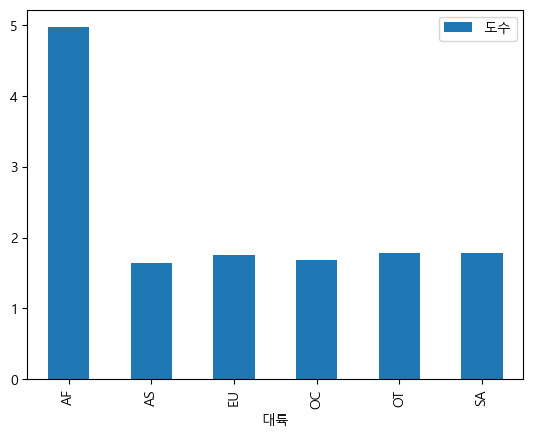

In [121]:
# case 2: pivot_table() 함수 이용
# pivot(피벗) = 재구조화
# pivot_table은 pandas에도, 데이터프레임 안에도 존재
df.pivot_table(
    index= '대륙',
    values= '도수',
    aggfunc= 'mean'
).plot(kind= 'bar')

---

### 연습
#### 총소비량을 기준으로 우리나라는 몇 위인가?
1. 총소비량을 기준으로 내림차순 정렬
2. 우리나라가 몇 번째 행에 존재하는가?
    - 인덱스를 초기화하고 기존의 인덱스는 제거
    - 국가가 'South korea'인 데이터의 인덱스를 추출해 +1 하고 순위 출력

In [122]:
# 1. 총소비량을 기준으로 내림차순 정렬
df.sort_values(['총소비량'], ascending= False, inplace= True)
df

,국가,맥주소비량,증류주소비량,와인소비량,순수알콜량,대륙,총소비량,도수
3,Andorra,245,138,312,12.4,EU,695,1.784173
45,Czech Republic,361,170,134,11.8,EU,665,1.774436
68,Grenada,199,438,28,11.9,OT,665,1.789474
61,France,127,151,370,11.8,EU,648,1.820988
141,Russian Federation,247,326,73,11.5,AS,646,1.780186
...,...,...,...,...,...,...,...,...
97,Libya,0,0,0,0.0,AF,0,0.000000
103,Maldives,0,0,0,0.0,AS,0,0.000000
111,Monaco,0,0,0,0.0,EU,0,0.000000
158,Somalia,0,0,0,0.0,AF,0,0.000000


In [124]:
# 2. 우리나라가 몇 번째 행에 존재하는가?
# 2-1. 인덱스 초기화 & 기존 인덱스 제거
df.reset_index(drop= True, inplace= True)
df

,국가,맥주소비량,증류주소비량,와인소비량,순수알콜량,대륙,총소비량,도수
0,Andorra,245,138,312,12.4,EU,695,1.784173
1,Czech Republic,361,170,134,11.8,EU,665,1.774436
2,Grenada,199,438,28,11.9,OT,665,1.789474
3,France,127,151,370,11.8,EU,648,1.820988
4,Russian Federation,247,326,73,11.5,AS,646,1.780186
...,...,...,...,...,...,...,...,...
188,Libya,0,0,0,0.0,AF,0,0.000000
189,Maldives,0,0,0,0.0,AS,0,0.000000
190,Monaco,0,0,0,0.0,EU,0,0.000000
191,Somalia,0,0,0,0.0,AF,0,0.000000


In [128]:
# 2-2. 국가가 'South korea'인 데이터의 인덱스를 추출해 +1 하고 순위 출력
flag = df['국가'] =='South Korea'

In [ ]:
df.loc[flag, ].index[0] + 1

np.int64(99)

- 국가별 총소비량 데이터를 막대그래프로 생성
- x축은 국가, y축은 총소비량

Text(108, 265, 'South Korea \n rank: 99 \n value: 165')

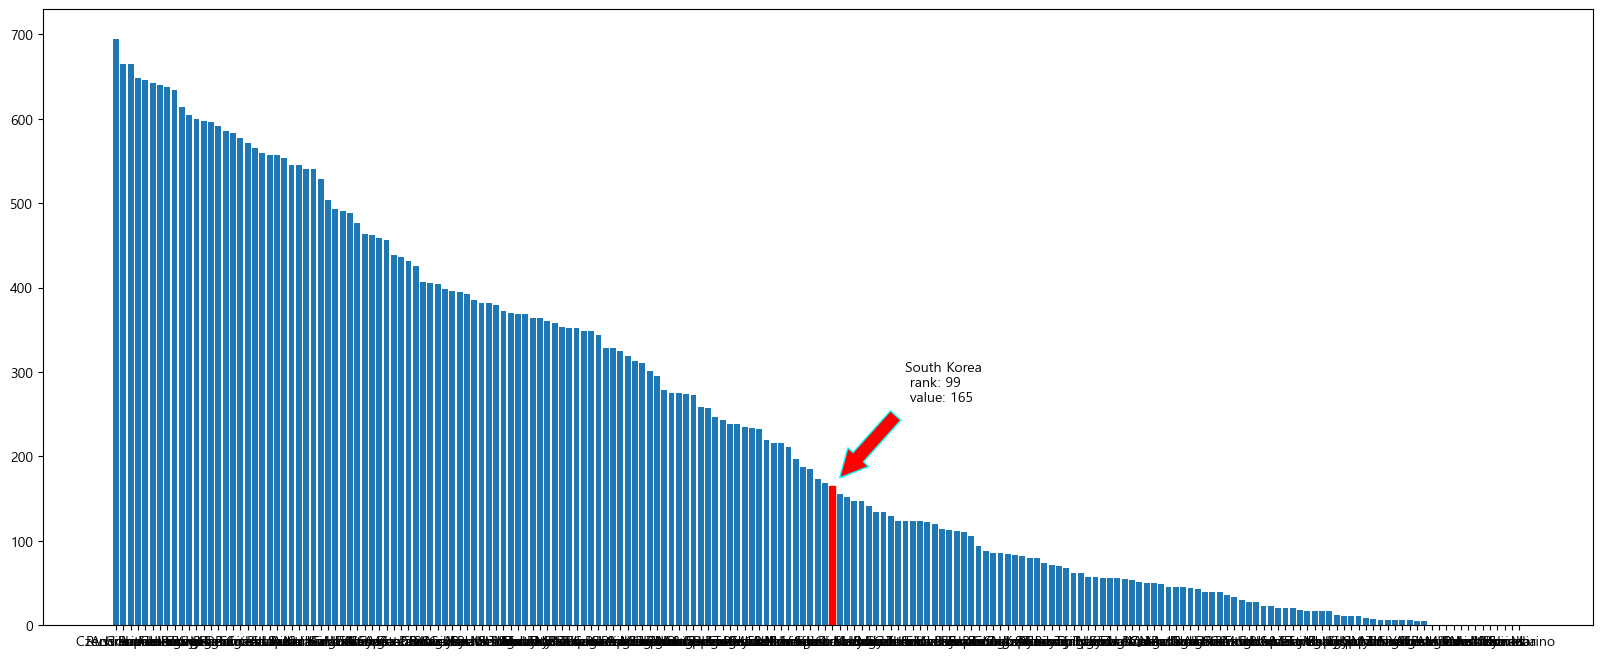

In [ ]:
x = df['국가']
y = df['총소비량']

# 한국의 인덱스 번호 저장
flag = df['국가'] =='South Korea'
korea_idx = df.loc[flag, ].index[0]
korea_value = df.loc[korea_idx, '총소비량']

# 그래프를 그냥 출력하면 국가의 개수가 너무 많아 글자가 겹친 채 출력된다.
# 그래프가 그려지는 공간의 사이즈 변경
plt.figure(figsize=(20, 8))

bar_list = plt.bar(x, y)

# korea_idx 위치의 막대 색상 변경
bar_list[korea_idx].set_color('r')

# 주석 추가
# annotate() : 화살표도 만들어줌
plt.annotate(
    f'South Korea \n rank: {korea_idx + 1} \n value: {korea_value}',
    # 주석의 위치 (설명이 되어야 하는 부분)
    xy= (korea_idx, korea_value),
    # 텍스트의 위치 (x축으로는 10, y축으로는 100 이동)
    xytext= (korea_idx + 10, korea_value + 100),
    # xy, xy_text를 연결하는 화살표 추가
    arrowprops= {
        'facecolor' : 'r',      # 화살표 내부의 색상 설정
        'edgecolor' : 'cyan',   # 화살표 테두리의 색상 설정
        'headwidth' : 20,       # 화살표 머리의 너비 설정
        'headlength' : 20,      # 화살표 머리의 길이 설정
        'width' : 10,           # 화살표 꼬리의 너비 설정
        'shrink' : 0.1          # 화살표와 xy, xy_text 사이의 간격 설정
    }
)

---
### 연습
#### 도수를 기준으로 우리나라는 몇 위인가?
1. 도수 컬럼을 기준으로 내림차순 정렬
2. 인덱스를 초기화하고 기존의 인덱스는 제거
3. 국가가 South Korea인 인덱스를 추출하여 korea_idx에 대입
4. 국가가 South korea인 데이터에서 도수의 value를 korea_value에 대입
5. 전체 데이터프레임에서 index와 도수 컬럼을 기준으로 하여 막대 그래프 생성
6. korea_idx 위치의 막대의 색상을 빨간색으로 변경하고 주석을 설정

In [147]:
# 1. 도수 컬럼을 기준으로 내림차순 정렬
df.sort_values(['도수'], ascending=False, inplace= True)
df

,국가,맥주소비량,증류주소비량,와인소비량,순수알콜량,대륙,총소비량,도수
171,Gambia,8,0,1,2.4,AF,9,26.666667
154,Sierra Leone,25,3,2,6.7,AF,30,22.333333
143,Nigeria,42,5,2,9.1,AF,49,18.571429
139,Uganda,45,9,0,8.3,AF,54,15.370370
145,Rwanda,43,2,0,6.8,AF,45,15.111111
...,...,...,...,...,...,...,...,...
188,Libya,0,0,0,0.0,AF,0,0.000000
189,Maldives,0,0,0,0.0,AS,0,0.000000
190,Monaco,0,0,0,0.0,EU,0,0.000000
191,Somalia,0,0,0,0.0,AF,0,0.000000


In [205]:
# 2. 인덱스를 초기화하고 기존의 인덱스는 제거
df.reset_index(drop= True, inplace= True)
df

,국가,맥주소비량,증류주소비량,와인소비량,순수알콜량,대륙,총소비량,도수
0,Gambia,8,0,1,2.4,AF,9,26.666667
1,Sierra Leone,25,3,2,6.7,AF,30,22.333333
2,Nigeria,42,5,2,9.1,AF,49,18.571429
3,Uganda,45,9,0,8.3,AF,54,15.370370
4,Rwanda,43,2,0,6.8,AF,45,15.111111
...,...,...,...,...,...,...,...,...
188,Libya,0,0,0,0.0,AF,0,0.000000
189,Maldives,0,0,0,0.0,AS,0,0.000000
190,Monaco,0,0,0,0.0,EU,0,0.000000
191,Somalia,0,0,0,0.0,AF,0,0.000000


In [206]:
# 3. 국가가 South Korea인 인덱스를 추출하여 korea_idx에 대입
flag = df['국가'] == 'South Korea'
korea_idx = df.loc[flag, ].index[0]
korea_idx

np.int64(14)

In [207]:
# 4. 국가가 South korea인 데이터에서 도수의 value를 korea_value에 대입
korea_value = df.loc[korea_idx, '도수']
korea_value

np.float64(5.93939393939394)

In [208]:
# korea_value 반올림 (소수점 둘째 자리까지)
korea_value = round(korea_value, 2)
korea_value

np.float64(5.94)

Text(24, 15.940000000000001, 'South Korea \n rank: 15 \n value: 5.94')

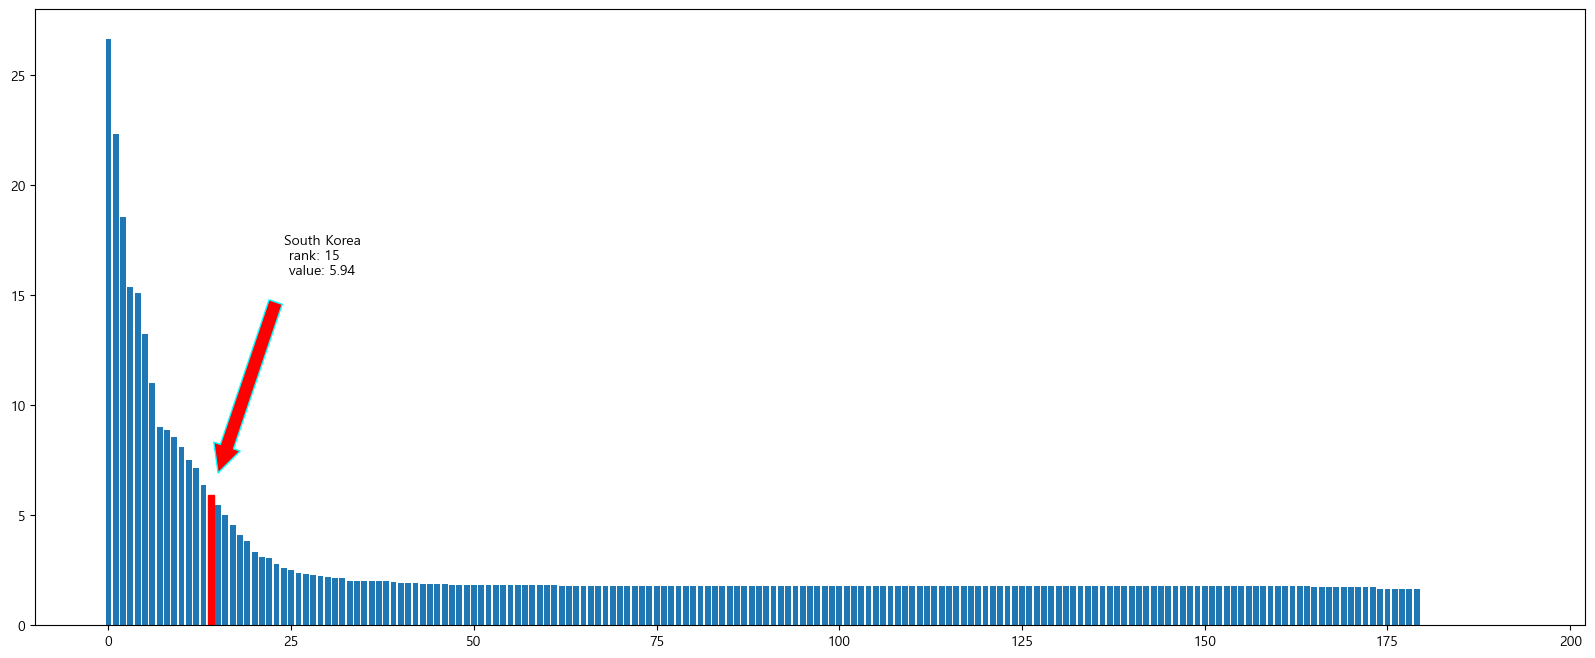

In [209]:
# 5. 전체 데이터프레임에서 index와 도수 컬럼을 기준으로 하여 막대 그래프 생성
x = df.index
y = df['도수']

# 그래프 사이즈 변경
plt.figure(figsize= (20, 8))

bar_list = plt.bar(x, y)

# 6. korea_idx 위치의 막대의 색상을 빨간색으로 변경하고 주석을 설정
# 색상 변경
bar_list[korea_idx].set_color('r')

# 주석 설정
plt.annotate(
    f'South Korea \n rank: {korea_idx + 1} \n value: {korea_value}',
    # 주석의 위치 (설명이 되어야 하는 부분)
    xy= (korea_idx, korea_value),
    # 텍스트의 위치 (x축으로는 10, y축으로는 100 이동)
    xytext= (korea_idx + 10, korea_value + 10),
    # xy, xy_text를 연결하는 화살표 추가
    arrowprops= {
        'facecolor' : 'r',      # 화살표 내부의 색상 설정
        'edgecolor' : 'cyan',   # 화살표 테두리의 색상 설정
        'headwidth' : 20,       # 화살표 머리의 너비 설정
        'headlength' : 20,      # 화살표 머리의 길이 설정
        'width' : 10,           # 화살표 꼬리의 너비 설정
        'shrink' : 0.1          # 화살표와 xy, xy_text 사이의 간격 설정
    }
)